In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [86]:
warnings.filterwarnings('ignore')

In [87]:
df= pd.read_csv('heart.csv')
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [88]:
df.shape

(303, 14)

In [89]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [90]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Checking the missing values with visual effects.

<Axes: >

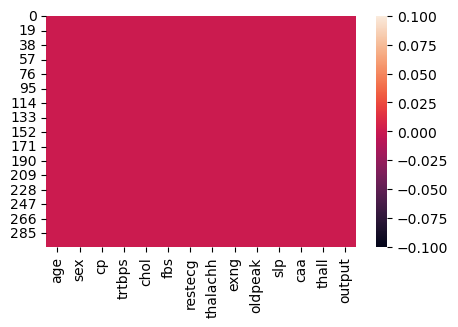

In [92]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull())

# To check which column has null values, means it will directly appear on screen as "NAN" in a particular column data.

In [93]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


# Spliting the data into two train and test datasets.

In [94]:
x= df.drop(columns='output')
y= df['output']
print('Shape of X df= ',x.shape)
print('Shape of y df= ',y.shape)

Shape of X df=  (303, 13)
Shape of y df=  (303,)


In [95]:
x.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

# To check the percentage of outputs.

In [96]:
y.value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: output, dtype: float64

#From the outputs i understood that the datasets are almost balanced, which means if you noticed 54.45% patients has higher risk of heart attack, where 45.54% has low risk. Please see the visual effects below: 

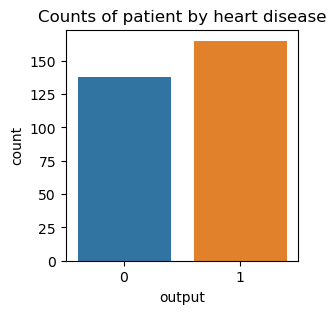

In [97]:
plt.figure(figsize=(3,3))
sns.countplot(x='output',data=df)
plt.title('Counts of patient by heart disease')
plt.show()

# To check patients are belong from which age category.

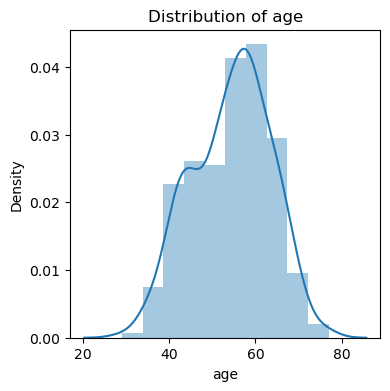

In [98]:
plt.figure(figsize=(4,4))
sns.distplot(x['age'],kde=True,bins=10)
plt.title('Distribution of age')
plt.show()

#Here got to know most of the patients are age in between 47 and 61. So it's looks like closely to normal distributions.

# Now will understand how many's are male and female patients.

In [99]:
df.groupby(['sex','output']).agg({'output':'count'})

output
sex output        
0   0           24
    1           72
1   0          114
    1           93

# To find out how many patients has chest pain.

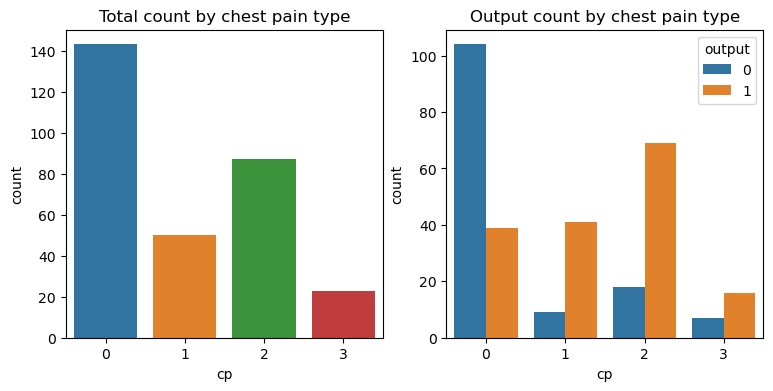

In [100]:
plt.figure(figsize=(9,4))


plt.subplot(1,2,1)
sns.countplot(x='cp',data= df)
plt.title('Total count by chest pain type')



plt.subplot(1,2,2)
sns.countplot(x='cp', data=df, hue='output')
plt.title('Output count by chest pain type')
plt.show()

#Around upto 140 patients with chest pain type 0, The graph indicates that there are more patients with a lower risk of heart disease when chest pain type is 1,2,3.

# To split the datasets into four parts to train the data and test as well.

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2)
print('Shape of X_train=',X_train.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of y_test=',y_test.shape)

Shape of X_train= (242, 13)
Shape of X_test= (61, 13)
Shape of y_train= (242,)
Shape of y_test= (61,)


# Standarization- Need to improve scaling features of datasets.

In [287]:
from sklearn.preprocessing import StandardScaler

In [288]:
sc= StandardScaler()
sc.fit(X_train)

StandardScaler()

#Here we are fitting the training datasets.

In [289]:
sc.mean_

array([5.44504132e+01, 6.73553719e-01, 9.58677686e-01, 1.32206612e+02,
       2.48706612e+02, 1.48760331e-01, 5.20661157e-01, 1.49107438e+02,
       3.51239669e-01, 1.00000000e+00, 1.38429752e+00, 7.56198347e-01,
       2.28512397e+00])

In [290]:
sc.scale_

array([ 9.22758731,  0.46891269,  1.01555419, 17.50745643, 51.39910961,
        0.35585207,  0.53163048, 23.01986266,  0.47735769,  1.11511034,
        0.60732556,  1.02573437,  0.634173  ])

In [291]:
X_train_sc= sc.transform(X_train)
X_test_sc= sc.transform(X_test)

In [292]:
X_train_sc

array([[ 0.49304186, -1.43641607, -0.94399461, ..., -0.6327702 ,
        -0.73722629, -0.44959966],
       [-0.59066504, -1.43641607,  0.04068942, ..., -0.6327702 ,
        -0.73722629, -0.44959966],
       [-1.34925987,  0.69617712,  0.04068942, ...,  1.01379312,
        -0.73722629, -0.44959966],
       ...,
       [ 0.38467117,  0.69617712, -0.94399461, ..., -0.6327702 ,
         0.23768498,  1.12725712],
       [ 0.16792979,  0.69617712, -0.94399461, ..., -2.27933353,
        -0.73722629,  1.12725712],
       [-1.0241478 ,  0.69617712, -0.94399461, ...,  1.01379312,
        -0.73722629, -0.44959966]])

In [295]:
X_train_sc= pd.DataFrame(X_train_sc, columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'])
X_test_sc= pd.DataFrame(X_test_sc, columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'])

# Logistic Regression - ML Model Training 

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [308]:
lcr= LogisticRegression(random_state=45)
lcr.fit(X_train_sc,y_train)

LogisticRegression(random_state=45)

In [309]:
lcr.coef_    #value of beta

array([[-0.26480661, -0.57944289,  0.84840842, -0.19485793, -0.10470321,
        -0.14158453,  0.15875257,  0.29189512, -0.61926532, -0.73068219,
         0.29047244, -0.9061008 , -0.4504583 ]])

In [310]:
lcr.intercept_  # intersection point

array([0.1333843])

# Predict the value of heart disease

In [311]:
y_pred_train= lcr.predict(X_train_sc)
y_pred_train  #serially all the patients heart conditions showing

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1],
      dtype=int64)

In [312]:
y_test  #checking with the test data

272    0
217    0
123    1
188    0
212    0
      ..
2      1
89     1
201    0
168    0
53     1
Name: output, Length: 61, dtype: int64

In [313]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))

Accuracy:  0.8636363636363636
Precision:  0.8450704225352113
Recall:  0.916030534351145


In [318]:
y_pred= lcr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

# Confusion Matrix

In [321]:
cm= confusion_matrix(y_test,y_pred, labels= lcr.classes_)
cm

array([[27,  0],
       [32,  2]], dtype=int64)

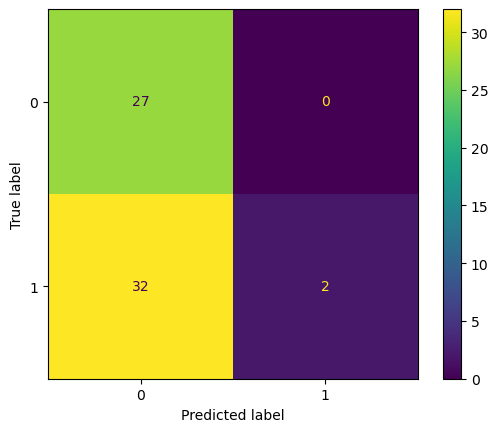

In [322]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# This is how we can trained and predict our model from label datasets. Here i observbed that my model gives me the accuracy rate with 86.3% from trained dataset.